In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.model_selection import cross_val_score,learning_curve, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc,confusion_matrix, roc_curve, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [44]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\moatz\Desktop\New folder (5)\workspace (10)\git hub\Databel - Data.csv")
print(df.shape)
df

(6687, 29)


,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6682,2940-QHVU,Yes,3,6,16.8,0.0,0.0,No,no,0.0,...,No,Yes,2,No,Month-to-Month,Paper Check,19,52,Competitor,Competitor offered higher download speeds
6683,3033-TMYG,Yes,1,7,15.0,0.0,0.0,No,no,0.0,...,No,Yes,3,Yes,Month-to-Month,Direct Debit,20,20,Competitor,Competitor offered higher download speeds
6684,7029-XDVM,Yes,6,20,46.9,0.0,0.0,No,no,0.0,...,No,Yes,6,Yes,Month-to-Month,Paper Check,18,108,Competitor,Competitor made better offer
6685,6614-NAJG,Yes,3,6,15.4,0.0,0.0,No,no,0.0,...,No,Yes,5,No,Month-to-Month,Credit Card,15,46,Attitude,Attitude of support person


In [45]:
from sklearn.preprocessing import LabelEncoder

abel = LabelEncoder()

df['Contract Type'] = label.fit_transform(df['Contract Type'])
df['Payment Method'] = label.fit_transform(df['Payment Method'])
df['Churn Label'] = label.fit_transform(df['Churn Label'])
df['Unlimited Data Plan'] = label.fit_transform(df['Unlimited Data Plan'])
df['Device Protection & Online Backup'] = label.fit_transform(df['Device Protection & Online Backup'])

df['Intl Active'] = label.fit_transform(df['Intl Active'])
df['Intl Plan'] = label.fit_transform(df['Intl Plan'])

In [46]:
df.drop(columns=['Customer ID','Extra International Charges','State','Phone Number','Under 30','Senior','Group','Churn Category','Churn Reason','Unlimited Data Plan','Gender'],inplace=True)

In [5]:
df['Contract Type'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [6]:
df.groupby('Churn Label')['Churn Label'].count()

Churn Label
No     4891
Yes    1796
Name: Churn Label, dtype: int64

<Axes: xlabel='Churn Label', ylabel='count'>

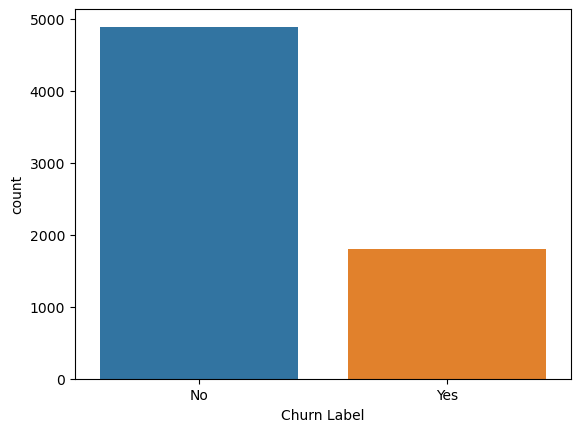

In [7]:
sns.countplot(data=df,x='Churn Label')

In [8]:
df.drop(columns=['State','Phone Number','Under 30','Senior','Group'],inplace=True)

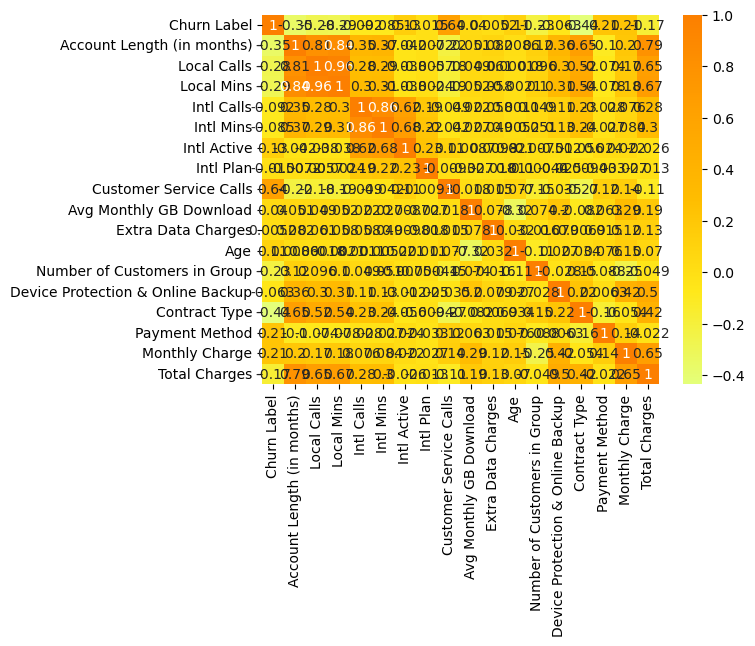

In [47]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [10]:
df.dropna(inplace=True)

C:\Users\moatz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


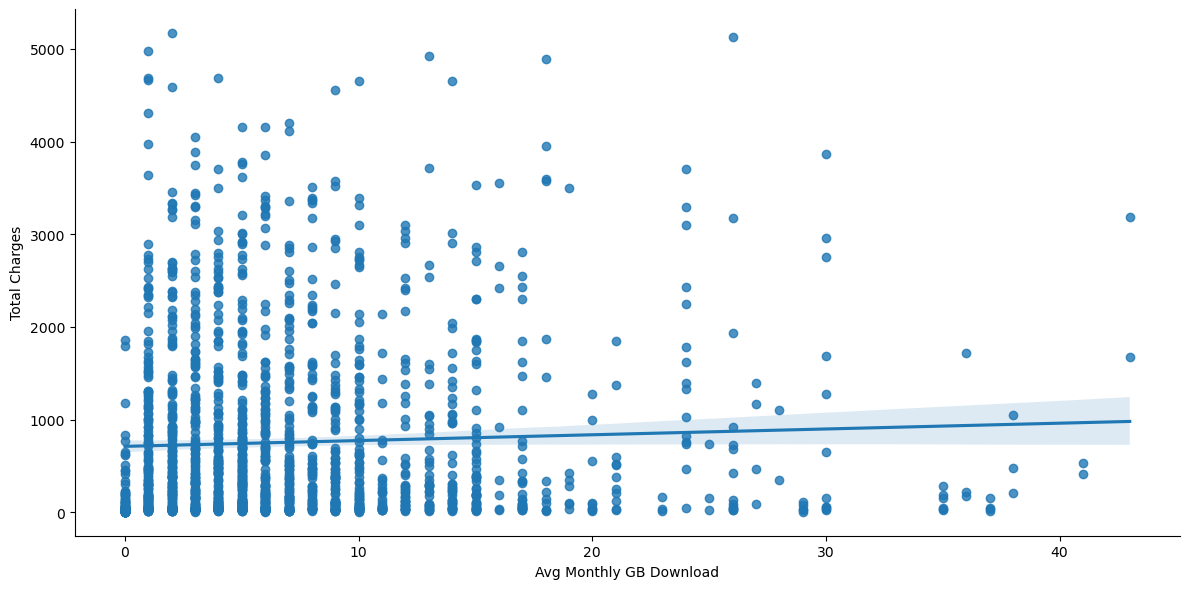

In [12]:
sns.lmplot(x='Avg Monthly GB Download',y='Total Charges', data=df, aspect=2, height=6)

In [36]:
import plotly.express as px
px.histogram(df,x="Total Charges")

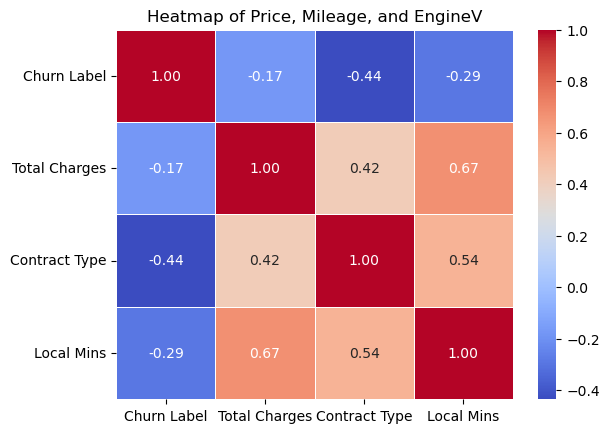

In [48]:
correlation_matrix = df[['Churn Label', 'Total Charges', 'Contract Type','Local Mins']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the plot
plt.title('Heatmap of Price, Mileage, and EngineV')
plt.show()

In [33]:
px.box(df,x='Total Charges')

In [49]:
df['Total Charges'] = np.log(df['Total Charges'])

In [35]:
df['Total Charges'].describe()

count    1648.000000
mean      564.482403
std       664.264510
min         6.000000
25%        52.000000
50%       281.500000
75%       858.250000
max      2642.000000
Name: Total Charges, dtype: float64

In [50]:
inputs=df.drop(columns='Churn Label')
target=df['Churn Label']

In [51]:
inputs

,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,Age,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges
0,1,3,8.0,0.0,0.0,0,0,0,3,0,35,0,0,0,1,10,2.302585
1,33,179,431.3,0.0,0.0,0,0,0,3,0,49,0,1,1,2,21,6.555357
2,44,82,217.6,0.0,0.0,0,1,0,3,0,51,0,1,1,1,23,6.921658
3,10,47,111.6,60.0,71.0,1,1,0,2,0,41,0,0,0,2,17,5.176150
4,62,184,621.2,310.0,694.4,1,1,0,3,0,51,0,0,1,1,28,7.450080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6682,3,6,16.8,0.0,0.0,0,0,0,4,0,42,2,0,0,2,19,3.951244
6683,1,7,15.0,0.0,0.0,0,0,5,17,0,24,3,1,0,1,20,2.995732
6684,6,20,46.9,0.0,0.0,0,0,4,10,0,48,6,1,0,2,18,4.682131
6685,3,6,15.4,0.0,0.0,0,0,2,5,0,45,5,0,0,0,15,3.828641


In [52]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [53]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

In [54]:
from sklearn.svm import SVC

# Train the SVR model on the training set
svc_model = SVC(kernel='rbf', C=1, gamma='scale')

# Train the model
svc_model.fit(x_train, y_train)

# Predict the test set
y_pred = svc_model.predict(x_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.71%


In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, BatchNormalization, Activation


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
model = Sequential()
model.add(Dense(132, input_shape=(x_train.shape[1],), activation="relu"))
BatchNormalization(),
model.add(Dense(56, activation="relu"))
model.add(Dense(16, activation="relu"))  
model.add(Dense(8, activation="relu"))  
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation="sigmoid"))                               # Output layer for binary classification

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

C:\Users\moatz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\moatz\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning:

Argument `alpha` is deprecated. Use `negative_slope` instead.



Epoch 1/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6999 - loss: 1.7167 - val_accuracy: 0.8056 - val_loss: 0.4776
Epoch 2/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7990 - loss: 0.5254 - val_accuracy: 0.7953 - val_loss: 0.7556
Epoch 3/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8417 - loss: 0.4292 - val_accuracy: 0.8327 - val_loss: 0.4006
Epoch 4/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8552 - loss: 0.3652 - val_accuracy: 0.8561 - val_loss: 0.3448
Epoch 5/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8664 - loss: 0.3281 - val_accuracy: 0.8523 - val_loss: 0.3749
Epoch 6/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8599 - loss: 0.3514 - val_accuracy: 0.8570 - val_loss: 0.3513
Epoch 7/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8497 - loss: 0.3581 - val_accuracy: 0.8589 - val_loss: 0.3455
Epoch 8/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8822 - loss: 0.2915 - val

In [58]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  #



# Testing set evaluation
print("\nTesting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Testing Results:
Accuracy: 0.8759
Confusion Matrix:
[[912  51]
 [115 260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       963
           1       0.84      0.69      0.76       375

    accuracy                           0.88      1338
   macro avg       0.86      0.82      0.84      1338
weighted avg       0.87      0.88      0.87      1338



In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a base model (Decision Tree Classifier)
base_model = DecisionTreeClassifier(random_state=42)

# Create a Bagging Classifier with the base model
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = bagging_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier: {accuracy:.4f}")

Accuracy of Bagging Classifier: 0.8752


In [60]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(
    criterion='entropy',
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Fit the model on the training data
best_RF.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, random_state=42)

In [61]:
y_train_pred = best_RF.predict(x_train)
y_test_pred = best_RF.predict(x_test)

# Training set evaluation
print("Training Results:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

# Testing set evaluation
print("\nTesting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Results:
Accuracy: 1.0000
Confusion Matrix:
[[3928    0]
 [   0 1421]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3928
           1       1.00      1.00      1.00      1421

    accuracy                           1.00      5349
   macro avg       1.00      1.00      1.00      5349
weighted avg       1.00      1.00      1.00      5349


Testing Results:
Accuracy: 0.8879
Confusion Matrix:
[[914  49]
 [101 274]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       963
           1       0.85      0.73      0.79       375

    accuracy                           0.89      1338
   macro avg       0.87      0.84      0.85      1338
weighted avg       0.89      0.89      0.89      1338



In [62]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist  # You can replace this with your own dataset

# Define the model-building function
def build_model(hp):
    model = Sequential()
    
    # Tune the number of layers (minimum 2 layers, maximum 10)
    num_layers = hp.Int('num_layers', min_value=2, max_value=10, default=2)  # Enforce at least 2 layers
    print(f"Number of layers chosen: {num_layers}")  # Debugging line
    
    # Add layers with tuned number of neurons (units)
    for i in range(num_layers):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=16, max_value=96, step=8),
                        activation='relu'))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model with a tunable optimizer
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model



# Make sure labels are 0 or 1
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Initialize the Keras Tuner with RandomSearch (you can also use Hyperband, BayesianOptimization, etc.)
tuner = kt.RandomSearch(
    build_model,  # The model-building function
    objective='val_accuracy',  # Objective to optimize
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # How many times to evaluate each trial
    directory='kt_dir',  # Directory to save the tuning results
    project_name='hyperparameter_tuning'  # Name of the project folder
)

# Perform hyperparameter search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters: ", best_hyperparameters.values)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Trial 4 Complete [00h 00m 25s]
val_accuracy: 0.7817638516426086

Best val_accuracy So Far: 0.8774290084838867
Total elapsed time: 00h 02m 17s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
2                 |6                 |num_layers
24                |48                |units_0
72                |56                |units_1
adam              |adam              |optimizer
48                |16                |units_2
32                |16                |units_3
96                |16                |units_4
80                |16                |units_5
96                |None              |units_6
56                |None              |units_7
16                |None              |units_8

Number of layers chosen: 2
Epoch 1/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7128 - loss: 3.8114 - val_accuracy: 0.7691 - val_loss: 0.6292
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7694 - loss: 0.5761 - val_accuracy: 0.7952 -

KeyboardInterrupt: 

In [63]:

logreg = LogisticRegression(max_iter=1000)

# Set up the parameter grid
param_grid = {
    'penalty': ['l2', 'none'],  # Regularization term (L2 regularization or none)
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solver for optimization
    'multi_class': ['ovr', 'multinomial'],  # For multi-class classification
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Make predictions using the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model
print("Test accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.

C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.

C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.

C:\Users\moatz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be

Best parameters found:  {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.89
Test accuracy: 0.88


In [64]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )

random_search.fit(x_train,y_train)
best_XGB=random_search.best_estimator_
y_pred = best_XGB.predict(x_test)
print(random_search.best_params_, random_search.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\moatz\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:01:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.




{'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 1.0} 0.9459191084461619


In [65]:
print("Test accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

Test accuracy: 0.90


In [66]:
y_pred = best_XGB.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  #



# Testing set evaluation
print("\nTesting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Testing Results:
Accuracy: 0.8961
Confusion Matrix:
[[912  51]
 [ 88 287]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       963
         1.0       0.85      0.77      0.81       375

    accuracy                           0.90      1338
   macro avg       0.88      0.86      0.87      1338
weighted avg       0.89      0.90      0.89      1338



In [67]:
pd.DataFrame({'ytttt':y_test,'ypre':y_pred})

,ytttt,ypre
5005,1.0,1
3163,0.0,0
106,0.0,0
6121,0.0,0
3102,0.0,0
...,...,...
1333,0.0,0
1731,0.0,1
5604,0.0,0
5452,0.0,0
